In [1]:
import pandas as pd
import re
import numpy
%matplotlib inline

In [2]:
Baseball_careers = pd.read_csv("Baseball_careers.csv")

In [3]:
Baseball_careers.head()

,Unnamed: 0,AB,Age,BB,From,G,H,HR,OPS,PA,R,SB,SO,To,WAR,experience,names,Zero
0,0,2216,32.326,297,1890,607,534,14,0.669,2532,338,53,221,1900,11.5,7,Bob Allen,0
1,1,43,23.178,2,1899,16,10,0,0.608,46,5,0,5,1900,0.1,2,Harvey Bailey,0
2,2,1,24.249,0,1900,1,0,0,0.000,1,0,0,0,1900,0.0,1,Rome Chambers,0
3,3,449,33.138,22,1899,130,132,3,0.758,476,70,10,25,1900,1.2,2,Pearce Chiles,0
4,4,4295,36.070,341,1884,1160,1231,77,0.769,4721,619,55,317,1900,32.1,17,Jack Clements,0


In [4]:
Baseball_careers[Baseball_careers["To"] == 1976]

,Unnamed: 0,AB,Age,BB,From,G,H,HR,OPS,PA,R,SB,SO,To,WAR,experience,names,Zero
8645,8645,12364,42.241,1402,1954,3298,3771,755,0.928,13941,2174,240,1383,1976,142.6,23,Hank Aaron HOF,0
8646,8646,1,29.137,0,1973,3,0,0,0.000,1,0,0,1,1976,0.0,4,Vic Albury,0
8647,8647,51,24.111,0,1973,25,8,2,0.471,51,4,0,5,1976,-0.4,4,Orlando Alvarez,0
8648,8648,435,28.331,42,1971,273,103,4,0.618,483,47,1,76,1976,-0.8,6,Chris Arnold,0
8649,8649,19,29.244,3,1970,55,2,0,0.385,22,0,0,11,1976,0.0,4,Rick Austin,0
8650,8650,2,24.198,0,1976,1,0,0,0.000,2,0,0,1,1976,0.0,1,Al Autry,0
8651,8651,117,28.111,6,1975,39,27,5,0.676,125,12,2,16,1976,-0.4,2,Billy Baldwin,0
8652,8652,0,24.174,0,1973,1,0,0,NaN,0,0,0,0,1976,0.0,3,Eddie Bane,0
8653,8653,0,25.021,0,1974,0,0,0,NaN,0,0,0,0,1976,0.0,3,Steve Barr,0
8654,8654,0,22.039,0,1976,0,0,0,NaN,0,0,0,0,1976,0.0,1,Chris Batton,0


In [5]:
Baseball_careers["Year_difference"] = Baseball_careers["To"] - Baseball_careers["From"]

In [6]:
Baseball_careers.sort_values(by = "To")

,Unnamed: 0,AB,Age,BB,From,G,H,HR,OPS,PA,R,SB,SO,To,WAR,experience,names,Zero,Year_difference
0,0,2216,32.326,297,1890,607,534,14,0.669,2532,338,53,221,1900,11.5,7,Bob Allen,0,10
17,17,19,25.144,0,1899,5,5,0,0.526,19,2,0,1,1900,0.0,2,Charlie Ziegler,0,1
16,16,281,24.364,14,1898,91,46,1,0.395,305,31,8,22,1900,-1.5,3,Walt Woods,0,2
15,15,23,26.173,2,1894,10,4,0,0.457,26,1,0,1,1900,0.0,3,Tom Thomas,0,6
14,14,4618,35.189,319,1887,1167,1290,27,0.696,5021,671,164,255,1900,10.1,13,Patsy Tebeau,0,13
12,12,1573,27.235,120,1897,428,437,10,0.707,1757,249,55,87,1900,2.7,4,Tom O'Brien,0,3
11,11,592,26.019,56,1896,160,150,0,0.639,660,66,11,42,1900,-0.4,3,Bert Myers,0,4
10,10,1099,33.137,70,1891,339,267,15,0.644,1172,163,16,118,1900,2.3,10,Jouett Meekin,0,9
9,9,998,29.209,131,1891,335,241,11,0.672,1148,151,9,216,1900,4.0,10,Frank Killen,0,9
13,13,0,31.022,0,1900,1,0,0,NaN,0,0,0,0,1900,0.0,1,Henry Stein,0,0


In [7]:
Baseball_careers.to_csv("Baseball_careers_fixed.csv")

In [8]:
Baseball_careers_1999 = Baseball_careers[Baseball_careers["From"] > 1999]

In [9]:
Baseball_careers.head()

,Unnamed: 0,AB,Age,BB,From,G,H,HR,OPS,PA,R,SB,SO,To,WAR,experience,names,Zero,Year_difference
0,0,2216,32.326,297,1890,607,534,14,0.669,2532,338,53,221,1900,11.5,7,Bob Allen,0,10
1,1,43,23.178,2,1899,16,10,0,0.608,46,5,0,5,1900,0.1,2,Harvey Bailey,0,1
2,2,1,24.249,0,1900,1,0,0,0.000,1,0,0,0,1900,0.0,1,Rome Chambers,0,0
3,3,449,33.138,22,1899,130,132,3,0.758,476,70,10,25,1900,1.2,2,Pearce Chiles,0,1
4,4,4295,36.070,341,1884,1160,1231,77,0.769,4721,619,55,317,1900,32.1,17,Jack Clements,0,16


In [10]:
Baseball_careers = Baseball_careers[Baseball_careers["From"] > 1949]


In [11]:
Baseball_careers.sort_values(by = "experience", ascending = False)

,Unnamed: 0,AB,Age,BB,From,G,H,HR,OPS,PA,R,SB,SO,To,WAR,experience,names,Zero,Year_difference
11097,11097,852,46.234,38,1966,427,94,2,0.282,957,40,3,371,1993,-2.0,27,Nolan Ryan HOF,0,27
10414,10414,900,46.003,33,1963,452,141,5,0.375,1030,43,0,211,1989,-0.3,26,Tommy John,0,26
14771,14771,400,49.191,35,1986,236,51,0,0.339,502,24,0,152,2012,0.2,25,Jamie Moyer,0,26
12788,12788,10961,44.268,2190,1979,3081,3055,297,0.820,13346,2295,1406,1694,2003,110.8,25,Rickey Henderson HOF,0,24
11188,11188,226,46.202,5,1970,456,33,1,0.345,250,7,0,53,1994,-0.1,25,Charlie Hough,0,24
9594,9594,1251,44.236,63,1959,840,232,16,0.494,1363,117,5,367,1983,6.2,25,Jim Kaat,0,24
10043,10043,14053,45.125,1566,1963,3562,4256,160,0.784,15890,2165,198,1143,1986,79.1,24,Pete Rose,0,23
14836,14836,10586,45.162,1028,1989,2968,2877,80,0.688,12013,1445,404,1087,2012,45.3,24,Omar Vizquel,0,23
10867,10867,4692,43.014,592,1969,1765,1093,96,0.666,5407,525,20,736,1992,25.3,24,Rick Dempsey,0,23
10165,10165,1537,48.179,17,1964,742,260,7,0.395,1707,80,0,314,1987,-0.8,24,Phil Niekro HOF,0,23


In [12]:
Baseball_careers_1_yr = Baseball_careers[Baseball_careers["experience"] == 1]

In [13]:
Baseball_careers_1_yr.sort_values(by = "G", ascending = False)

,Unnamed: 0,AB,Age,BB,From,G,H,HR,OPS,PA,R,SB,SO,To,WAR,experience,names,Zero,Year_difference
6759,6759,477,25.217,42,1959,152,104,0,0.531,527,42,6,53,1959,-1.2,1,Sparky Anderson HOF,0,0
6096,6096,407,32.095,47,1952,124,108,1,0.653,462,55,7,22,1952,1.0,1,Hector Rodriguez,0,0
6014,6014,355,20.142,26,1952,124,78,0,0.538,386,32,3,37,1952,-1.8,1,Tony Bartirome,0,0
6244,6244,418,22.333,56,1954,121,83,3,0.562,482,38,1,84,1954,-1.5,1,Gair Allie,0,0
9185,9185,198,23.228,14,1980,115,50,1,0.601,216,20,2,16,1980,-0.6,1,Jesus Figueroa,0,0
6029,6029,219,24.282,28,1952,106,41,2,0.535,256,31,3,30,1952,-1.4,1,Jack Daniels,0,0
6133,6133,310,26.237,51,1953,105,66,3,0.648,366,48,15,53,1953,-0.2,1,Carlos Bernier,0,0
15026,15026,192,26.001,18,2013,102,49,0,0.645,216,21,4,44,2013,0.7,1,Derrick Robinson,0,0
6765,6765,280,31.083,25,1959,88,69,17,0.782,308,39,1,54,1959,1.0,1,Jim Baxes,0,0
7848,7848,196,27.080,7,1969,87,44,1,0.538,208,20,1,19,1969,-1.0,1,Juan Rios,0,0


In [14]:
Baseball_careers_1_yr["G"].median()

5.0

In [59]:
Baseball_careers_1_yr_grouped = Baseball_careers_1_yr["G"].value_counts().reset_index()

In [73]:
Baseball_careers_1_yr_grouped.sort_values(by = "index", ascending = False)

,index,G
85,152,1
60,124,2
67,121,1
66,115,1
65,106,1
63,105,1
68,102,1
69,88,1
70,87,1
71,86,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d4be518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112b1a940>]], dtype=object)

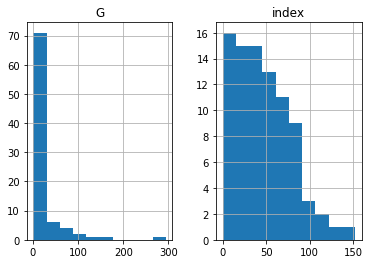

In [67]:
Baseball_careers_1_yr_grouped.hist()

In [70]:
Baseball_careers_1_yr_grouped.to_csv("Baseball_careers_1_yr_grouped.csv")

In [71]:
Baseball_careers_1_yr_grouped.reset_index()

,level_0,index,G
0,0,0,294
1,1,1,163
2,2,2,142
3,3,3,114
4,4,4,105
5,5,5,84
6,6,8,79
7,7,7,71
8,8,6,65
9,9,9,50


In [61]:
Baseball_careers_1_yr_grouped.head()

,index,G
0,0,294
1,1,163
2,2,142
3,3,114
4,4,105


In [64]:
Baseball_careers_1_yr_grouped["G"].sum()

1751

In [16]:
Baseball_careers["HOF"]  = Baseball_careers["names"].str.contains("HOF")

In [17]:
Baseball_careers["one"] = 1

In [18]:
Baseball_careers_HOF = Baseball_careers[Baseball_careers["HOF"] == True]

In [19]:
Baseball_careers_not_HOF = Baseball_careers[Baseball_careers["HOF"] == False]

In [20]:
Baseball_careers_not_HOF["one"].sum()

8662

In [21]:
Baseball_careers_HOF["one"].sum()

83

In [22]:
HOF_1 = pd.DataFrame([{"HOF": 83, "Not_HOF": 8662, "Total": 8745}])
HOF = pd.DataFrame([8662, 83], ["not HOF", "HOF"])

In [23]:
HOF

,0
not HOF,8662
HOF,83


In [24]:
HOF_1["Percent_HOF"] = 0.95
HOF_1["Percent_Not_HOF"] = 99.05
HOF_1["Percent_Total"] = 100


In [25]:
HOF_1

,HOF,Not_HOF,Total,Percent_HOF,Percent_Not_HOF,Percent_Total
0,83,8662,8745,0.95,99.05,100


In [26]:
HOF_1.to_csv("HOF.csv")

In [27]:
HOF = HOF.reset_index()

In [28]:
HOF.columns = ["HOF", "Count"]

In [29]:
HOF = HOF.sort_values(by = "Count", ascending = True)

In [30]:
HOF

,HOF,Count
1,HOF,83
0,not HOF,8662


In [31]:
HOF.to_csv("HOF_1.csv")

In [32]:
Baseball_careers[Baseball_careers["names"] == "Nolan Ryan HOF"]

,Unnamed: 0,AB,Age,BB,From,G,H,HR,OPS,PA,...,SB,SO,To,WAR,experience,names,Zero,Year_difference,HOF,one
11097,11097,852,46.234,38,1966,427,94,2,0.282,957,...,3,371,1993,-2.0,27,Nolan Ryan HOF,0,27,True,1


In [33]:
Baseball_careers["experience"].median()

4.0

In [34]:
Baseball_careers["experience"].mean()

5.8205831903945109

In [35]:
Baseball_careers_distribution = Baseball_careers["experience"].value_counts().reset_index()  

In [36]:
Baseball_careers_distribution["experience"].median()

190.0

In [37]:
Baseball_careers_distribution["experience"].mean()

323.88888888888891

In [38]:
Baseball_careers_distribution

,index,experience
0,1,1751
1,2,1243
2,3,917
3,4,657
4,5,554
5,6,485
6,7,427
7,8,412
8,9,364
9,11,317


In [39]:
Baseball_careers_distribution.to_csv("Baseball_careers_distribution.csv")

In [40]:
Baseball_careers_1999.drop("Unnamed: 0", 1, inplace= True)

In [41]:
Baseball_careers_1999_distribution = Baseball_careers_1999["experience"].value_counts().reset_index()  

In [42]:
Baseball_careers_1999_distribution.to_csv("Baseball_careers_1999_distribution.csv")

In [43]:
Baseball_careers_1999_distribution

,index,experience
0,1,487
1,2,384
2,3,257
3,4,170
4,5,140
5,6,97
6,7,81
7,8,55
8,9,47
9,11,25


In [44]:
Baseball_careers_1999_distribution.columns = ["index", "experience_distribution"]

In [45]:
Baseball_careers_1999_distribution

,index,experience_distribution
0,1,487
1,2,384
2,3,257
3,4,170
4,5,140
5,6,97
6,7,81
7,8,55
8,9,47
9,11,25


In [46]:
Baseball_careers_1999_merged = Baseball_careers_1999.merge(Baseball_careers_1999_distribution, left_on = "experience", right_on = "index")

In [47]:
Baseball_careers_1999_merged.to_csv("Baseball_careers_1999_merged.csv")

In [48]:
Baseball_careers_1999_merged

,AB,Age,BB,From,G,H,HR,OPS,PA,R,SB,SO,To,WAR,experience,names,Zero,Year_difference,index,experience_distribution
0,28,28.053,4,2000,27,7,2,0.879,32,5,0,12,2000,0.1,1,Dusty Allen,0,0,1,487
1,5,32.136,0,2000,2,1,0,0.400,5,1,0,1,2000,-0.1,1,Clemente Alvarez,0,0,1,487
2,3,22.029,0,2000,2,0,0,0.000,3,0,0,2,2000,0.0,1,Clayton Andrews,0,0,1,487
3,27,25.299,4,2000,19,6,2,0.767,31,5,0,7,2000,0.2,1,Mike Bell,0,0,1,487
4,12,26.119,4,2000,13,2,0,0.542,16,1,1,4,2000,-0.1,1,Tarrik Brock,0,0,1,487
5,1,24.218,0,2000,4,1,0,2.000,1,0,0,0,2000,0.1,1,Justin Brunette,0,0,1,487
6,80,28.281,4,2000,31,21,5,0.799,87,10,0,21,2000,0.4,1,Alex Cabrera,0,0,1,487
7,0,28.143,0,2000,0,0,0,NaN,0,0,0,0,2000,0.0,1,Cameron Cairncross,0,0,1,487
8,1,25.046,0,2000,8,1,0,4.000,1,0,0,0,2000,0.1,1,Eric Cammack,0,0,1,487
9,27,31.319,4,2000,15,6,3,0.878,31,4,0,13,2000,-0.1,1,Bubba Carpenter,0,0,1,487


In [49]:
Baseball_careers_1999.to_csv("Baseball_careers_1999.csv")

In [50]:
Baseball_careers["Year_difference"].mean()

5.3598627787307036

In [51]:
Baseball_careers_5 = Baseball_careers.tail()

In [52]:
Baseball_careers_life = Baseball_careers_5["From"]

In [53]:
Baseball_careers_life = pd.DataFrame(Baseball_careers_life)

In [54]:
Baseball_careers_life["names"] = Baseball_careers_5["names"]
Baseball_careers_life["Year_To"] = Baseball_careers_5["To"]

In [55]:
Baseball_careers_life.columns = ["Year_From", "Names", "Year_To"]

In [56]:
Baseball_careers_life.to_csv("Baseball_careers_small.csv")

In [57]:
Baseball_careers_life

,Year_From,Names,Year_To
15066,2000,Dewayne Wise,2013
15067,2007,Ross Wolf,2013
15068,2004,Kevin Youkilis,2013
15069,2000,Michael Young,2013
15070,2007,Mike Zagurski,2013
